In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as spp

In [14]:
def C(x):
    if type(x)==str:
        if 'Canada' in x:
            return True
        else:
            return False
    return False

def G(x):
    if type(x)==str:
        if 'Greece' in x:
            return True
        else:
            return False
    return False

def P(x):
    if type(x)==str:
        if 'Portugal' in x:
            return True
        else:
            return False
    return False

def I(x):
    if type(x)==str:
        if 'Italy' in x:
            return True
        else:
            return False
    return False

def F(x):
    if type(x)==str:
        if 'France' in x:
            return True
        else:
            return False
    return False

def U(x):
    if type(x)==str:
        if 'US' in x:
            return True
        else:
            return False
    return False

print (data)

data = pd.read_csv("winemag-data-130k-v2.csv")
df = data[['country', 'points', 'price']]
df.to_csv ('new_wine.csv', index=False)
data_new = pd.read_csv ('new_wine.csv')

data_new = data_new.groupby(data.apply(lambda x: C(x['country']) or G(x['country']) or P(x['country']) or F(x['country']) or I(x['country']) or U(x['country']), axis=1))
data_new = data_new.get_group(True)
data_new = data_new.dropna(axis=0)

# data_new = data_new.sort_values(by='country')
# data_new = data_new[:1000]
# data_new.groupby('country').groups

        Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
12996

Закончили предварительную обработку таблиц. Посчитаем соотношение цена/качество для каждой записи. И построим "ящики с усами" чтобы прикинуть совпадают ли дисперсии

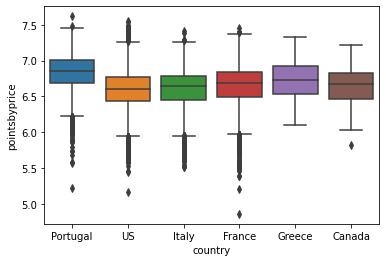

In [15]:
data_new['pointsbyprice']= data_new.apply(lambda x: x['points']/(10+np.log( x['price'])), axis=1)

sns.boxplot( y=data_new['pointsbyprice'], x=data_new['country'] );
plt.show()

По графикам видно, что все плохо и дисперсии не совпадают, теперь проверим это статистически с помощью Теста Левена. Также проверим с помощью Теста Шапиро нормальность выборок.

In [17]:
print (stats.levene(data_new['pointsbyprice'][data['country'] == 'Portugal'], data_new['pointsbyprice'][data_new['country'] == 'Greece'], data_new['pointsbyprice'][data_new['country'] == 'Canada']))
print (stats.shapiro(data_new['pointsbyprice'][data_new['country'] == 'Portugal']))
print (stats.shapiro(data_new['pointsbyprice'][data_new['country'] == 'Greece']))
print (stats.shapiro(data_new['pointsbyprice'][data_new['country'] == 'Canada']))

LeveneResult(statistic=3.530985144246875, pvalue=0.029341410309435587)
ShapiroResult(statistic=0.974319338798523, pvalue=9.390311398481639e-29)
ShapiroResult(statistic=0.9893981218338013, pvalue=0.002050064504146576)
ShapiroResult(statistic=0.9927505850791931, pvalue=0.25151291489601135)
ShapiroResult(statistic=0.9855698347091675, pvalue=7.430619964704963e-38)
ShapiroResult(statistic=0.9817042350769043, pvalue=2.6386450083236305e-42)
ShapiroResult(statistic=0.9982869029045105, pvalue=7.81336181927162e-23)


Нормальности тоже нет. Нельзя использовать ни ANOVA ни Крускала-Уоллиса (

In [9]:
print (stats.kruskal(data_new['pointsbyprice'][data_new['country'] == 'Portugal'], data_new['pointsbyprice'][data_new['country'] == 'Greece'], data_new['pointsbyprice'][data_new['country'] == 'Canada']))

KruskalResult(statistic=212.2322929863956, pvalue=8.209999622816209e-47)


In [10]:
#Данна, Тьюки:
print(pairwise_tukeyhsd(endog=data_new['pointsbyprice'], groups=data_new['country'], alpha=0.05))
print ('\n')
print (spp.posthoc_dunn([data_new['pointsbyprice'][data_new['country'] == 'Portugal'], data_new['pointsbyprice'][data_new['country'] == 'Greece'], data_new['pointsbyprice'][data_new['country'] == 'Canada']], p_adjust='fdr_bh'))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj  lower  upper  reject
----------------------------------------------------
Canada   Greece   0.0613 0.0032 0.0172 0.1054   True
Canada Portugal   0.1795  0.001 0.1432 0.2159   True
Greece Portugal   0.1183  0.001 0.0908 0.1458   True
----------------------------------------------------


              1             2             3
1  1.000000e+00  3.025846e-23  6.972300e-29
2  3.025846e-23  1.000000e+00  2.310528e-03
3  6.972300e-29  2.310528e-03  1.000000e+00


In [7]:
data_new_crosstab = pd.crosstab(data_new['points'], data_new['country'], margins = False)
print(data_new_crosstab) 

country  Canada  Greece  Portugal
points                           
80            0       0         2
81            0       0        11
82            2       4        27
83            3       9       102
84            4      42       303
85            7      48       530
86           11      59       536
87           30      87       592
88           32      79       672
89           29      58       334
90           42      44       526
91           43      14       420
92           34      15       352
93           14       2       250
94            3       0       122
95            0       0        61
96            0       0        16
97            0       0        12
98            0       0         3
99            0       0         2
100           0       0         2


In [8]:
sp.stats.chi2_contingency(data_new_crosstab)

(204.3401399230755,
 6.432158976486775e-24,
 40,
 array([[9.08765653e-02, 1.64937388e-01, 1.74418605e+00],
        [4.99821109e-01, 9.07155635e-01, 9.59302326e+00],
        [1.49946333e+00, 2.72146691e+00, 2.87790698e+01],
        [5.17996422e+00, 9.40143113e+00, 9.94186047e+01],
        [1.58579606e+01, 2.87815742e+01, 3.04360465e+02],
        [2.65813953e+01, 4.82441860e+01, 5.10174419e+02],
        [2.75355993e+01, 4.99760286e+01, 5.28488372e+02],
        [3.22157424e+01, 5.84703041e+01, 6.18313953e+02],
        [3.55781753e+01, 6.45729875e+01, 6.82848837e+02],
        [1.91295170e+01, 3.47193202e+01, 3.67151163e+02],
        [2.78082290e+01, 5.04708408e+01, 5.33720930e+02],
        [2.16740608e+01, 3.93375671e+01, 4.15988372e+02],
        [1.82207513e+01, 3.30699463e+01, 3.49709302e+02],
        [1.20865832e+01, 2.19366726e+01, 2.31976744e+02],
        [5.67978533e+00, 1.03085868e+01, 1.09011628e+02],
        [2.77173524e+00, 5.03059034e+00, 5.31976744e+01],
        [7.27012522e-01